# set up

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
hotel_booking = pd.read_csv('hotel_bookings.csv')
booking_23 = pd.read_csv('bookings_2023.csv')
bookings = pd.read_csv('bookings.csv')

author explaination for 3 datasets: 

These data sets contain the information on 119,390 hotel bookings between 1st of July of 2015 and the 31st of August 2017. Each observation represents a hotel booking.

The data for two hotels is given. Both hotels are located in Portugal: the Resort Hotel is in the region of the Algarve and the City Hotel is in the city of Lisbon.

- The original, raw data set is given in the hotel_bookings.csv file. 

- bookings_2023.csv is a slightly simplified version with 23 features. 

- The bookings.csv file has been further reduced to 10 columns and pre-processed to aid analysis.

Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

`since the three datasets are essentially variations of one another, 'hotel booking' has been chosen as the primary dataset due to its raw data.`

data dictionary
|*categories*|*columns*|*meaning*|
|---|---|---|
|`hotel character`      |hotel|type of hotel            |
|`customer behavior`    |is_canceled                    |when ever booking was cancelled or not|
|`customer behavior`    |lead_time                      |number of day that elapsed between the entering date of the booking in to the PMS and the arrival date|
|`customer behavior`    |days_in_waiting_list           |number of days the booking was in the waiting list before it was confirmed to the customer|
|`customer behavior`    |arrival_date_year              |year of arrival date|
|`customer behavior`    |arrival_date_month             |month of arrival date with 12 categories: 'Jan' to 'Dec'|
|`customer behavior`    |arrival_date_week_number       |week number of the arrival date|
|`customer behavior`    |arrival_date_day_of_month      |day of the month of the arrival date|
|`customer behavior`    |stays_in_weekend_nights        |number of weekend nights 'Sat' or 'Sun' the guest stayed or booked to stay at the hotel|
|`customer behavior`    |stays_in_week_nights           |number of week nights 'Mon' to 'Fri' the guest stayed or booked to stay at the hotel|
|`customer character`   |adults                         |number of adults|
|`customer character`   |children                       |number of children|
|`customer character`   |babies                         |number of babies|
|`customer character`   |meal                           |type of meal booked. Categories are presented in standard hospitality meal packages: <br> - Undefined/SC – no meal package; <br> - BB – Bed & Breakfast; <br> - HB – Half board (breakfast and one other meal – usually dinner); <br> - FB – Full board (breakfast, lunch and dinner)|
|`customer character`   |country                        |country of origin. categories are represented in the ISO format|
|`customer sources`     |market_segment                 |Market segment designation. In categories, the term <br> - “TA” means “Travel Agents” <br> - “TO” means “Tour Operators”|
|`customer sources`     |distribution_channel           |booking distribution channel. the term <br> - 'TA' mean 'Travel Agents'<br> - 'TO' mean 'Tour Operators'|
|`customer behavior`    |is_repeated_guest              |value indicating if the booking name was from a repeated guest 1 or not 0|
|`customer behavior`    |previous_cancellations         |number of previous bookings that were cancelled by the customer prior to the current booking|
|`customer behavior`    |previous_bookings_not_canceled|number of previous bookings not cancelled by the customer prior to the current booking|
|`customer behavior`    |reserved_room_type             |code of room type reserved. code is presented instead of designation for anonymity reasons|
|`customer behavior`    |assigned_room_type             |code for the type of room assigned to the booking. Sometimes the assigned room type differs from there served room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
|`customer behavior`    |booking_changes                |number of changes/amendments made to the booking from the moment the booking was entered on the PMS (Property Management System) until the moment of check-in or cancellation.|
|`customer behavior`    |deposit_type                   |indication of if the customer made a deposit to guarantee the booking, this variable can assume three categories: <br> - no deposit - no deposit was made, <br> - no refund - a deposit was made in the value of the total stay cost, <br> - refundable - a deposit was made with a value under the total cost of stay
|`customer sources`     |agent                          |ID of the travel agency that made the booking|
|`customer sources`     |company                        |ID of the company/entity that mafe the booking or responsible dor paying the booking. ID is presented instead of designation for anonymity reasons|
|`customer character`   |customer_type                  |type of booking, assuming one of four categories: <br> - contract - when the booking has an allotment or other type of contract associated to it, <br> - group - when the booking is associated to a group, <br> - transient - when the booking is not part of a group or contract, and is not associated to other transient booking, <br> - transient-party - when the booking is transient, but is associated to at least other transient booking|
|`hotel character`      |adr                            |average daily rate as defined by 5|
|`customer character`   |required_car_parking_spaces    |number of car parking spaces required by the customer|
|`customer behavior`    |total_of_special_requests      |number of special requests made by the customer (twin bed or high)|
|`customer behavior`    |reservation_status             |reservation last status, assuming one of three categories: <br> - Canceled – booking was canceled by the customer; <br> - Check-Out – customer has checked in but already departed; <br> - No-Show – customer did not check-in and did inform the hotel of the reason why
|`customer behavior`    |reservation_status_date        |date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [3]:
hotel_booking.sample(5)

hotel  is_canceled  lead_time  arrival_date_year   
53446    City Hotel            1        193               2016  \
88456    City Hotel            0         24               2016   
47885    City Hotel            1         90               2016   
88302    City Hotel            0          2               2016   
29580  Resort Hotel            0         47               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month   
53446               June                        26                         20  \
88456              April                        18                         28   
47885              March                        11                          7   
88302           December                        51                         14   
29580           November                        45                          1   

       stays_in_weekend_nights  stays_in_week_nights  adults  children   
53446                        1                     2       2     0.000  \
88456                        2                     7       2     0.000   
47885                        1                     4       2     0.000   
88302                        0                     3       2     0.000   
29580                        0                     5       2     0.000   

       babies meal country market_segment distribution_channel   
53446       0   BB     PRT  Offline TA/TO                TA/TO  \
88456       0   BB     DEU  Offline TA/TO                TA/TO   
47885       0   BB     FRA      Online TA                TA/TO   
88302       0   BB     PRT      Corporate            Corporate   
29580       0   BB     SWE      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations   
53446                  0                       0  \
88456                  0                       0   
47885                  0                       0   
88302                  1                       0   
29580                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type   
53446                               0                  A                  A  \
88456                               0                  D                  D   
47885                               0                  A                  A   
88302                               1                  A                  A   
29580                               0                  A                  A   

       booking_changes deposit_type   agent  company  days_in_waiting_list   
53446                0   Non Refund 162.000      NaN                    39  \
88456                0   No Deposit  16.000      NaN                     0   
47885                0   No Deposit   9.000      NaN                     0   
88302                2   No Deposit     NaN  227.000                     0   
29580                0   No Deposit 241.000      NaN                     0   

      customer_type     adr  required_car_parking_spaces   
53446     Transient 120.000                            0  \
88456     Transient 107.000                            0   
47885     Transient  73.950                            0   
88302     Transient  86.000                            0   
29580     Transient  32.340                            0   

       total_of_special_requests reservation_status reservation_status_date  
53446                          0           Canceled              2016-01-18  
88456                          0          Check-Out              2016-05-07  
47885                          0           Canceled              2016-03-04  
88302                          1          Check-Out              2016-12-17  
29580                          1          Check-Out              2016-11-06

In [4]:
print(f'hotel_booking {hotel_booking.shape}')

hotel_booking (119390, 32)


# cleaning

## overal

In [5]:
hotel_booking.columns

# dataset has 119390 rows and 32 columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
hotel_booking[[ 'hotel', 'market_segment', 'distribution_channel', 'agent', 'company',
                'adults', 'children', 'babies', 'meal', 'country', 'customer_type',
                'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'required_car_parking_spaces', 'total_of_special_requests', 'days_in_waiting_list',  'adr',
                'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status', 'reservation_status_date',
                'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled'
                ]]

hotel market_segment distribution_channel   agent  company   
0       Resort Hotel         Direct               Direct     NaN      NaN  \
1       Resort Hotel         Direct               Direct     NaN      NaN   
2       Resort Hotel         Direct               Direct     NaN      NaN   
3       Resort Hotel      Corporate            Corporate 304.000      NaN   
4       Resort Hotel      Online TA                TA/TO 240.000      NaN   
...              ...            ...                  ...     ...      ...   
119385    City Hotel  Offline TA/TO                TA/TO 394.000      NaN   
119386    City Hotel      Online TA                TA/TO   9.000      NaN   
119387    City Hotel      Online TA                TA/TO   9.000      NaN   
119388    City Hotel      Online TA                TA/TO  89.000      NaN   
119389    City Hotel      Online TA                TA/TO   9.000      NaN   

        adults  children  babies meal country customer_type  is_canceled   
0            2     0.000       0   BB     PRT     Transient            0  \
1            2     0.000       0   BB     PRT     Transient            0   
2            1     0.000       0   BB     GBR     Transient            0   
3            1     0.000       0   BB     GBR     Transient            0   
4            2     0.000       0   BB     GBR     Transient            0   
...        ...       ...     ...  ...     ...           ...          ...   
119385       2     0.000       0   BB     BEL     Transient            0   
119386       3     0.000       0   BB     FRA     Transient            0   
119387       2     0.000       0   BB     DEU     Transient            0   
119388       2     0.000       0   BB     GBR     Transient            0   
119389       2     0.000       0   HB     DEU     Transient            0   

        lead_time  stays_in_weekend_nights  stays_in_week_nights   
0             342                        0                     0  \
1             737                        0                     0   
2               7                        0                     1   
3              13                        0                     1   
4              14                        0                     2   
...           ...                      ...                   ...   
119385         23                        2                     5   
119386        102                        2                     5   
119387         34                        2                     5   
119388        109                        2                     5   
119389        205                        2                     7   

       reserved_room_type assigned_room_type  booking_changes deposit_type   
0                       C                  C                3   No Deposit  \
1                       C                  C                4   No Deposit   
2                       A                  C                0   No Deposit   
3                       A                  A                0   No Deposit   
4                       A                  A                0   No Deposit   
...                   ...                ...              ...          ...   
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        required_car_parking_spaces  total_of_special_requests   
0                                 0                          0  \
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          1   
...                        

In [7]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## duplicate

In [8]:
# checking total duplicated
hotel_booking.duplicated().sum()

31994

In [9]:
# view duplicate
hotel_booking[hotel_booking.duplicated()].sort_values('reservation_status_date')

# there are 39158 duplicated rows.

hotel  is_canceled  lead_time  arrival_date_year   
73846     City Hotel            1        307               2015  \
73790     City Hotel            1        279               2015   
73894     City Hotel            1        321               2015   
73893     City Hotel            1        321               2015   
73892     City Hotel            1        321               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119373    City Hotel            0        175               2017   
39993   Resort Hotel            0        153               2017   
40035   Resort Hotel            0         21               2017   
40036   Resort Hotel            0        279               2017   

       arrival_date_month  arrival_date_week_number   
73846              August                        34  \
73790                July                        30   
73894           September                        36   
73893           September                        36   
73892           September                        36   
...                   ...                       ...   
119349             August                        35   
119373             August                        35   
39993              August                        35   
40035              August                        35   
40036              August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights   
73846                          20                        0  \
73790                          23                        0   
73894                           3                        0   
73893                           3                        0   
73892                           3                        0   
...                           ...                      ...   
119349                         31                        0   
119373                         31                        1   
39993                          28                        2   
40035                          31                        2   
40036                          31                        2   

        stays_in_week_nights  adults  children  babies meal country   
73846                      2       2     0.000       0   BB     PRT  \
73790                      2       2     0.000       0   BB     PRT   
73894                      2       2     0.000       0   BB     PRT   
73893                      2       2     0.000       0   BB     PRT   
73892                      2       2     0.000       0   BB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119349                     3       2     0.000       0   BB     DEU   
119373                     3       1     0.000       0   BB     NLD   
39993                      5       2     1.000       0   HB     PRT   
40035                      5       2     0.000       0   BB     GBR   
40036                      5       2     0.000       0   BB     GBR   

       market_segment distribution_channel  is_repeated_guest   
73846          Groups                TA/TO                  1  \
73790          Groups                TA/TO                  1   
73894          Groups                TA/TO                  1   
73893          Groups                TA/TO                  1   
73892          Groups                TA/TO                  1   
...               ...                  ...                ...   
119349      Online TA                TA/TO                  0   
119373  Offline TA/TO                TA/TO                  0   
39993          Direct               Direct                  0   
40035   Offline TA/TO                TA/TO                  0   
40036   Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled   
73846                        1                               0  \
73790                        1        

as author claim that:

'This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). <br>
Both datasets share the same structure, with 31 variables describing the 40060 observations of H1 and 79330 observations of H2.

*"Each observation represents a hotel booking."*

Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

*"Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted."*

Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.'

```cause of 'Each observation represents a hotel booking' therefore data record is separate customers from separate hotels and coincidencelly have the same data. the action here is choose to keep all the duplications.```  

## null data

In [10]:
# checking null
hotel_booking.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [11]:
# checking undefined via listing unique values
for i in hotel_booking.columns:
    print(i)
    print(hotel_booking[i].unique())
    print('___________')

hotel
['Resort Hotel' 'City Hotel']
___________
is_canceled
[0 1]
___________
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153

in short:
|*columns*|*problem*|
|---|---|
|agent| has nan|
|company| has nan|
|children| has nan|
|country| has nan|
|meal| has Undefined|
|market_segment| has Undefined|
|distribution_channel| has Undefined|

author claim that: <br>
In some categorical variables like Agent or Company, “NULL” is presented as one of the categories.<br>
This should not be considered a missing value, but rather as “not applicable”. <br>
For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

as said above, 

- for the 'agent' and 'company' columns can change 'nan values' into:
    - 0 as customer not come from agent/company
    - 1 as customer come from agent/company

In [12]:
# create def to change data value 
def convert_num(i):
    if i > 0:
        return 1
    return 0

# apply def 
hotel_booking['agent_encode'] = hotel_booking.agent.apply(convert_num)
hotel_booking['company_encode'] = hotel_booking.company.apply(convert_num)

In [13]:
# 'children' columns has 4 nan values replace by median
hotel_booking['children'] = hotel_booking['children'].fillna(hotel_booking['children'].median())

In [14]:
# 'country' columns has 488 nulls values
# not using to run model but can use to illustrate customer character 
# leave as it is
hotel_booking.country.isnull().sum()
hotel_booking.country.value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [15]:
# as dictionary states that:
# - Undefined/SC : no meal package
# - BB : Bed & Breakfast
# - HB : Half board (breakfast and one other meal – usually dinner)
# - FB : Full board (breakfast, lunch and dinner)

# as said: encode 'meal' as Undefined/SC: 0 and others: 1
def convert_meal(j):
    if j == 'Undefined' or j == 'SC':
        return 0
    return 1

hotel_booking['meal_encode'] = hotel_booking.meal.apply(convert_meal)

In [16]:
# 'market_segment' and 'distribution_channel' have less than 6 'undefined' values 
# leave as it is
print(hotel_booking.market_segment.value_counts())
print('-----------')
print(hotel_booking.distribution_channel.value_counts())

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64
-----------
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


## outliers

In [17]:
# create new dataset of numberic columns
hotel_outliers = hotel_booking.select_dtypes('number')

In [18]:
# print out columns counter to read plot
a = 0
for i in hotel_outliers.columns:
    a += 1
    print(f'{a} : {i}')

1 : is_canceled
2 : lead_time
3 : arrival_date_year
4 : arrival_date_week_number
5 : arrival_date_day_of_month
6 : stays_in_weekend_nights
7 : stays_in_week_nights
8 : adults
9 : children
10 : babies
11 : is_repeated_guest
12 : previous_cancellations
13 : previous_bookings_not_canceled
14 : booking_changes
15 : agent
16 : company
17 : days_in_waiting_list
18 : adr
19 : required_car_parking_spaces
20 : total_of_special_requests
21 : agent_encode
22 : company_encode
23 : meal_encode


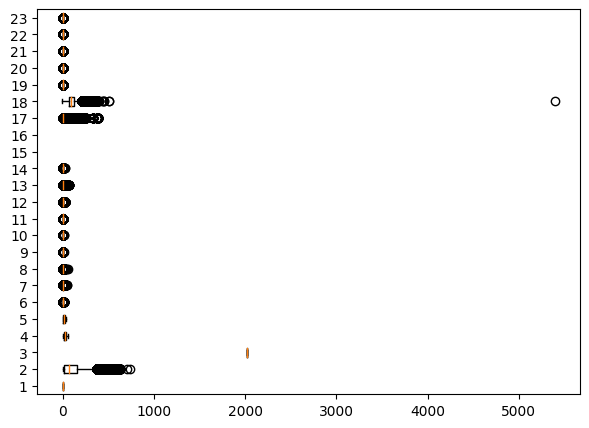

In [19]:
plt.figure(figsize=(7,5))
plt.boxplot(hotel_outliers, vert = False)

plt.show()

# showed that columns 18 which is 'adr' has 1 outliers -> choose to delete that row

In [20]:
# drop outliers 
hotel_booking = hotel_booking[hotel_booking['adr'] < 1000] #.reset_index(drop=True, inplace=True)

## merge columns

In [21]:
# create columns 'family_size' for illustation
hotel_booking['family_size'] = hotel_booking['adults'] + hotel_booking['children'] + hotel_booking['babies']

In [22]:
# booking_requests = booking_changes + required_car_parking_spaces + total_of_special_requests : cause of this is all request in booking process.
hotel_booking['booking_requests'] = hotel_booking.booking_changes + hotel_booking.required_car_parking_spaces + hotel_booking.total_of_special_requests

In [23]:
hotel_booking['stay_in_days'] = hotel_booking.stays_in_weekend_nights + hotel_booking.stays_in_week_nights


## create data for illustrate and calculate


In [24]:
# create columns 'source' for illustrate customer sources 
hotel_booking['source'] = np.where((hotel_booking['agent'] > 0) & (hotel_booking['company'] > 0), 'both',
                          np.where(hotel_booking['agent'] > 0, 'agent',
                          np.where(hotel_booking['company'] > 0, 'comapny', 
                          'not applicable')))

# create columns 'meal_request' 
meal_dictionary = {'BB': 'Meal', 'FB': 'Meal', 'HB': 'Meal', 'SC': 'No meal', 'Undefined': 'No meal'}
hotel_booking['meal_request'] = hotel_booking['meal'].map(meal_dictionary)

# create columns 'repeated_guest'
repeated_guest_dictionary = {0: 'New guest', 1: 'Old guest'}
hotel_booking['repeated_guest'] = hotel_booking['is_repeated_guest'].map(repeated_guest_dictionary)

In [25]:
# create columns 'cancelation_status'
cancel_dictionary = {0: 'Check_in', 1: 'Canceled'}
hotel_booking['cancelation_status'] = hotel_booking['is_canceled'].map(cancel_dictionary)

In [26]:
# create columns 'total_booking'
hotel_booking['total_booking'] = hotel_booking.previous_cancellations + hotel_booking.previous_bookings_not_canceled + 1

In [27]:
hotel_booking['total_cancelation'] = hotel_booking['previous_cancellations'] + hotel_booking['is_canceled']

In [28]:
hotel_booking['cancelation_rate'] = (hotel_booking['total_cancelation'] / hotel_booking['total_booking'] )* 100

## drop unnescessary columns

drop columns below cause of:
- `reservation_status`: exactly as 'is_canceled' columns
- `reservation_status_date`: not see the use
- `arrival_date_year`: this analysis focus on customer behaviours in months and days
- `arrival_date_week_number`: this analysis focus on customer behaviours in months and days
- `company`: replace by 'company_encode'
- `agent`: replace by 'agent_encode'
- `market_segment`: similar with distribution_channel
- `adults`, `children`, `babies`: replace by 'family size'
- `stays_in_weekend_nights`, `stays_in_week_nights`: replace by 'stay_in_days'


In [29]:
hotel_booking = hotel_booking.drop(['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 
                                    'company', 'agent',
                                    'market_segment',
                                    'adults', 'children', 'babies',
                                    'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests',
                                    'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1)

# EDA

In [30]:
# basic graphs
hotel_booking.hist(figsize= (20,20))
plt.show()

In [31]:
# set up data for PBI
hotel_booking.to_csv('hotel_illus.csv', index=True)

In [32]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119389 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_month              119389 non-null  object 
 4   arrival_date_day_of_month       119389 non-null  int64  
 5   meal                            119389 non-null  object 
 6   country                         118901 non-null  object 
 7   distribution_channel            119389 non-null  object 
 8   is_repeated_guest               119389 non-null  int64  
 9   previous_cancellations          119389 non-null  int64  
 10  previous_bookings_not_canceled  119389 non-null  int64  
 11  reserved_room_type              119389 non-null  object 
 12  assigned_room_type   

# encode

In [33]:
# checks columns
for i in hotel_booking.columns:
    print(i)
    print(hotel_booking[i].unique())
    print('___________')

hotel
['Resort Hotel' 'City Hotel']
___________
is_canceled
[0 1]
___________
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153

In [34]:
# seperate numeric columns
hb_numeric = hotel_booking.select_dtypes(include='number')

In [35]:
# encode the categories columns using onthot
hotel_dictionary = {'Resort Hotel': 1, 'City Hotel': 0}
hotel_booking['hotel_encode'] = hotel_booking.hotel.map(hotel_dictionary)

onehot_month            = pd.get_dummies(hotel_booking['arrival_date_month'], prefix = 'month').astype(int)
onehot_market           = pd.get_dummies(hotel_booking['distribution_channel'], prefix = 'market').astype(int)
onehot_reserved_room    = pd.get_dummies(hotel_booking['reserved_room_type'], prefix = 'reserved_room').astype(int)
onehot_assigned_room    = pd.get_dummies(hotel_booking['assigned_room_type'], prefix = 'assigned_room').astype(int)
onehot_deposit_type     = pd.get_dummies(hotel_booking['deposit_type'], prefix = 'deposit_type').astype(int)
onehot_customer_type    = pd.get_dummies(hotel_booking['customer_type'], prefix = 'customer_type').astype(int)

In [36]:
# create new dataset to concate 2 datasets

hb_encode = pd.concat([
    hb_numeric, # the dataset
    onehot_month,
    onehot_market,
    onehot_reserved_room,
    onehot_assigned_room,
    onehot_deposit_type,
    onehot_customer_type
], axis = 1)

In [37]:
hb_encode.shape


(119389, 63)

# X, y defining

In [38]:
# calculate correlation of others columns to 'is_canceled'
hb_correlation = hb_encode.corr(numeric_only=True)[['is_canceled']]
hb_correlation.drop(index='is_canceled', inplace=True)
hb_correlation = hb_correlation.sort_values(by='is_canceled', ascending=False)

# plot chart
fig, ax = plt.subplots(figsize=(20, 20))

# draw a seperate linne at x = 0
ax.axvline(x=0, color='gray', linestyle='--')

# bar chart
colors = np.where(hb_correlation['is_canceled'] > 0, 'lightblue', 'lightcoral')
bars = ax.barh(hb_correlation.index, hb_correlation['is_canceled'], color=colors)

# rearrange value lable of bar chart
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.01 if width >= 0 else width - 0.05 # if value > 0 set in the right else set in the left
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=13)

ax.set_xlabel('Correlation')
ax.set_title('Correlation with Cancelation', size=16)
plt.grid()
plt.tight_layout()
plt.show()

as showed in the graph:

`'cancelation_rate' is extremely correlate with 'is_canceled' will effect model accuaracy--> not use this columns in model `

In [39]:
# sort columns have value outside of this range (-0.1, 0.1)
sorted(hb_correlation[ ~hb_correlation['is_canceled'].between(-0.1, 0.1)].index)

['agent_encode',
 'assigned_room_A',
 'assigned_room_D',
 'booking_requests',
 'cancelation_rate',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'lead_time',
 'market_Direct',
 'market_TA/TO',
 'previous_cancellations',
 'total_cancelation']

In [40]:
hb_encode_corr =  hb_encode[['is_canceled',
                             'agent_encode',
                            'assigned_room_A',
                            'assigned_room_D',
                            'booking_requests',
                            # 'cancelation_rate',
                            'customer_type_Transient',
                            # 'customer_type_Transient-Party',
                            'deposit_type_No Deposit',
                            # 'deposit_type_Non Refund',
                            'lead_time',
                            # 'market_Direct',
                            'market_TA/TO'
                            # 'previous_cancellations',
                            # 'total_cancelation'
                            ]]

In [41]:
# create dataset correlation and only select the correlation out of the range (-0.1, 0.1)
def high_corr(value):
  if -0.2 < value < 0.2:
    return 0
  return value
hb_high_correlation = hb_encode_corr.corr(numeric_only=True)
hb_high_correlation = hb_high_correlation.applymap(high_corr)

# draw heatmap of correlation
plt.figure(figsize=(8,8))
sns.heatmap(hb_high_correlation, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

<Axes: >

there are couples of columns that have high correlation  with each other:
- customer_type_transient and customer_type_transient_party
- deposit_type_No_deposit and deposit_type_No_refund
- market_Direct and market_TA/TO
- previous_cancellations and total_cancelation

`the choice is to delete 1 of each columns to prevent Multicollinearity (Đa cộng tuyến)`

In [42]:
# dataset with all the columns
hb_encode_corr.shape

(119389, 9)

# balance data

<Axes: >

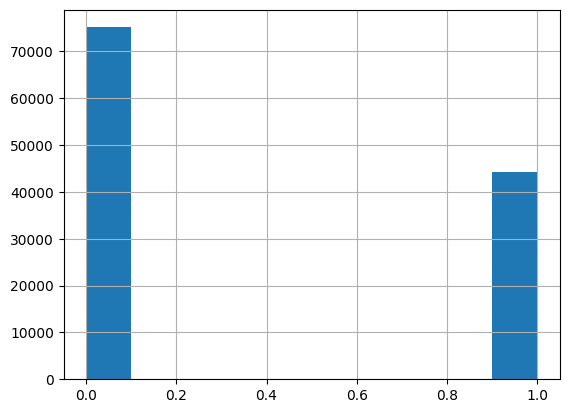

In [43]:
hb_encode_corr['is_canceled'].hist()

In [44]:
# dataset not cancel == 0
hbc_0 = hb_encode_corr[hb_encode_corr.is_canceled == 0]

# dataset is canceled == 1
hbc_1 = hb_encode_corr[hb_encode_corr.is_canceled == 1]

# dataset size
hbc_0.shape, hbc_1.shape
# random choose data from hbc_0
hbc_0_resapled = hbc_0.sample(44223, random_state=1)

# new dataset
hbc_0_resapled.shape
# connect hb_0 and hbc_1
hb_balance = pd.concat([hbc_0_resapled,hbc_1]) 

# y after rebalance
hb_balance['is_canceled'].value_counts()

is_canceled
0    44223
1    44223
Name: count, dtype: int64

In [45]:
hb_balance.reset_index(drop=True, inplace=True)

# normalization: min-max scaler

In [46]:
# Scale X2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(hb_balance.iloc[:, 1:11].values)

# create new dataframe
hb = pd.DataFrame(data = X_scaled, columns = hb_balance.iloc[:, 1:11].columns)

# add y2 column
hb['is_canceled'] = hb_balance['is_canceled']

hb.head()

agent_encode  assigned_room_A  assigned_room_D  booking_requests   
0         1.000            0.000            1.000             0.143  \
1         1.000            0.000            1.000             0.000   
2         1.000            1.000            0.000             0.048   
3         0.000            0.000            0.000             0.000   
4         1.000            0.000            1.000             0.048   

   customer_type_Transient  deposit_type_No Deposit  lead_time  market_TA/TO   
0                    0.000                    1.000      0.267         1.000  \
1                    1.000                    1.000      0.000         1.000   
2                    1.000                    1.000      0.350         1.000   
3                    1.000                    1.000      0.000         0.000   
4                    1.000                    1.000      0.040         1.000   

   is_canceled  
0            0  
1            0  
2            0  
3            0  
4            0

# split train test dataset

In [47]:
# chose X, y

y = hb['is_canceled'].values
X = hb[['agent_encode', 'assigned_room_A', 'assigned_room_D', 'booking_requests', 'customer_type_Transient', 'deposit_type_No Deposit', 'lead_time', 'market_TA/TO']].values

In [48]:
X_set = ['agent_encode', 'assigned_room_A', 'assigned_room_D', 'booking_requests', 'customer_type_Transient', 'deposit_type_No Deposit', 'lead_time', 'market_TA/TO']

In [49]:
# check values

print(X)
print('------')
print(y)
print('------')


[[1.         0.         1.         ... 1.         0.26709062 1.        ]
 [1.         0.         1.         ... 1.         0.         1.        ]
 [1.         1.         0.         ... 1.         0.34976153 1.        ]
 ...
 [0.         1.         0.         ... 1.         0.01112878 0.        ]
 [0.         0.         1.         ... 1.         0.00953895 0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]]
------
[0 0 0 ... 1 1 1]
------


In [50]:
# run split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
print(
X_train.sum(),
X_test.sum(),
y_train.sum(),
y_test.sum(),
)


270611.94867136044 115934.50791127264 30969 13254


# models

## Logistic Regression

### model set up

In [52]:
# import models
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state=1)
model_logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

### results

In [53]:
from sklearn.metrics import classification_report

# predict y
y_pred_logistic = model_logistic.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     13280
           1       0.77      0.67      0.71     13254

    accuracy                           0.73     26534
   macro avg       0.74      0.73      0.73     26534
weighted avg       0.74      0.73      0.73     26534



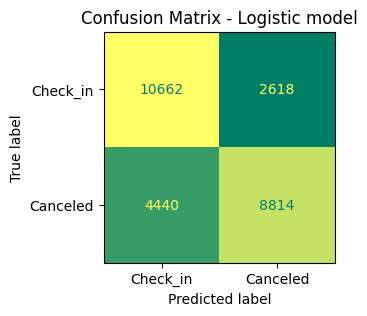

In [54]:
# matrix graph
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic,
                                        display_labels=['Check_in', 'Canceled'],
                                        ax=ax, colorbar=False, cmap="summer")
ax.set_title(f"Confusion Matrix - Logistic model")
plt.show()

### add on dictionary to compare models

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [56]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_logistic)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y1_proba_logistic = model_logistic.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y1_proba_logistic)
auc_score = roc_auc_score(y_test, y1_proba_logistic)

# class_report
report = classification_report(y_test, y_pred_logistic, output_dict=True)

In [57]:
# update dictionary to compare
model_results = {}
model_results['Logistic Regresson'] = {
  'Params': None,
  'TP': tp,
  'FN': fn,
  'TN': tn,
  'FP': fp,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
  'ROC AUC Score': auc_score,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
}

## Naive Bayes

### model set up

In [58]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB()

### results

In [59]:
# predict
y_pred_GNB = model_GNB.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.62      0.96      0.76     13280
           1       0.91      0.43      0.58     13254

    accuracy                           0.69     26534
   macro avg       0.77      0.69      0.67     26534
weighted avg       0.77      0.69      0.67     26534



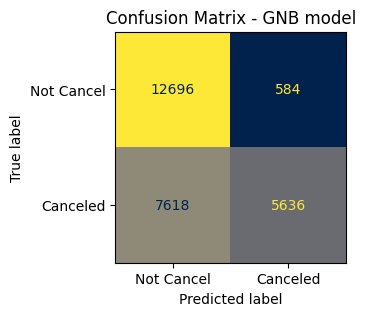

In [60]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_GNB,
                                        display_labels=['Not Cancel', 'Canceled'],
                                        ax=ax,
                                        colorbar=False,cmap="cividis")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

### add dictionary

In [61]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_GNB)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_GNB = model_GNB.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_GNB)
auc_score = roc_auc_score(y_test, y_proba_GNB)

# class_report
report = classification_report(y_test, y_pred_GNB, output_dict=True)

In [62]:
# update dictionary to compare
model_results['GNB'] = {
  'Params': None,
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
  'ROC AUC Score': auc_score,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
}

## Decision Tree

### model set up

Mô hình có score cao nhất = 75.72% tại số tầng = [15]


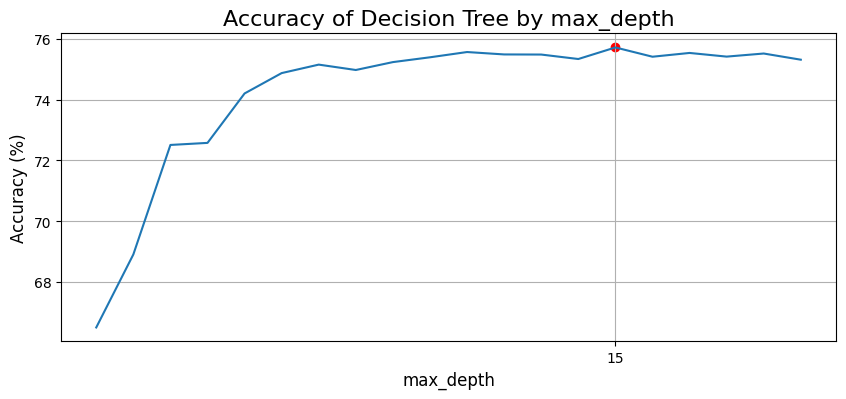

In [63]:
from sklearn import tree

tree_scores = []
for d in range(1, 21):
    model_tree = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    model_tree.fit(X_train, y_train)
    model_score = model_tree.score(X_test, y_test)
    tree_scores.append(model_score*100)

# Plot score
max_depth = [n for n in range(1, 21)]
max_n =     [n      for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]
max_score = [score  for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]
x_ticks =   [n      for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]

print(f"Mô hình có score cao nhất = {max_score[0]:.2f}% tại số tầng = {max_n}")

plt.figure(figsize=(10, 4))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(max_depth, tree_scores)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('max_depth',fontsize=12)
plt.xticks(x_ticks, size=10)
plt.title("Accuracy of Decision Tree by max_depth", size=16)
plt.grid()
plt.show()

In [64]:
model_tree = tree.DecisionTreeClassifier(max_depth=15, random_state=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

### results

In [65]:
# predict
y_pred_tree = model_tree.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     13280
           1       0.79      0.70      0.74     13254

    accuracy                           0.76     26534
   macro avg       0.76      0.76      0.76     26534
weighted avg       0.76      0.76      0.76     26534



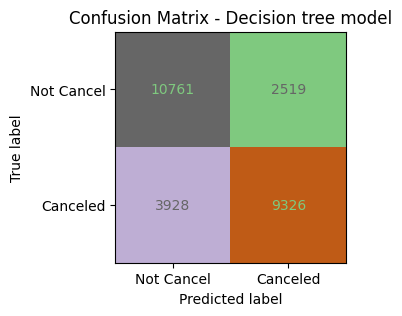

In [66]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_tree,
                                        display_labels=['Not Cancel', 'Canceled'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Accent")
ax.set_title(f"Confusion Matrix - Decision tree model")
plt.show()

In [67]:
# tree graph
import graphviz
dot_data = tree.export_graphviz(
    model_tree,
    out_file= None,
    feature_names= X_set,
    class_names = ['Not Cancel', 'Canceled'],
    filled= True,
    rounded= True,
    special_characters= True
)
graph= graphviz.Source(dot_data)
graph

### add dictionary

In [68]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_tree)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_tree = model_tree.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_tree)
auc_score = roc_auc_score(y_test, y_proba_tree)

# class_report
report = classification_report(y_test, y_pred_tree, output_dict=True)

In [69]:
# update dictionary to compare
model_results['Decesion Tree'] = {
  'Params': 'max_depth = 1',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## Radom Forest

### model set up

Mô hình có score cao nhất = 0.75 tại số cây = [78]


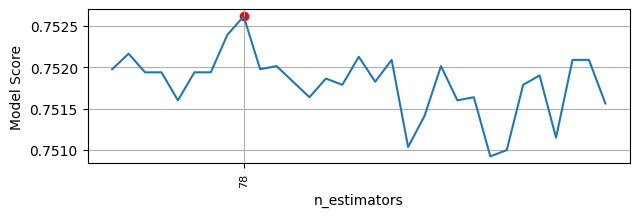

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
for trees in range(70, 101):
    model_forest = RandomForestClassifier(n_estimators=trees, random_state = 1)
    model_forest.fit(X_train, y_train)
    model_score = model_forest.score(X_test, y_test)
    rf_scores.append(model_score)

# Plot score
n_estimators = [n for n in range(70, 101)]
max_n        = [n for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]
max_score    = [score for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]
x_ticks      = [n for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]

print(f"Mô hình có score cao nhất = {max_score[0]:.2f} tại số cây = {max_n}")

plt.figure(figsize=(7, 2))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(n_estimators, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('Model Score')
plt.xticks(x_ticks, rotation=90, size=8)
plt.grid()
plt.show()

# n_estimators = 90

In [71]:
model_forest = RandomForestClassifier(n_estimators=99, random_state = 1)
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=99, random_state=1)

### results

In [72]:
# predict
y_pred_forest = model_forest.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_forest, digits = 4))

              precision    recall  f1-score   support

           0     0.7475    0.7622    0.7548     13280
           1     0.7569    0.7420    0.7494     13254

    accuracy                         0.7521     26534
   macro avg     0.7522    0.7521    0.7521     26534
weighted avg     0.7522    0.7521    0.7521     26534



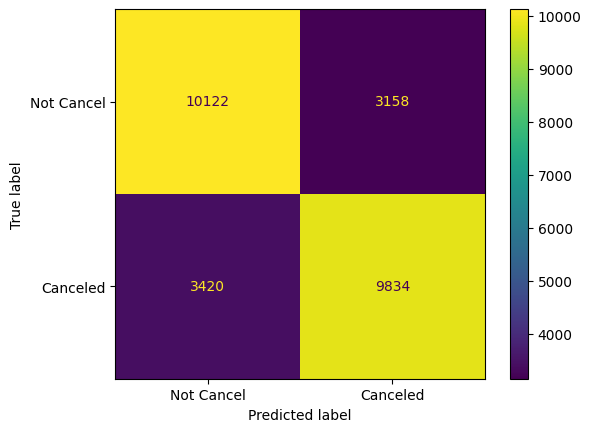

In [73]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_forest,
                                        display_labels=['Not Cancel', 'Canceled'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Accent")
disp.plot(values_format='')
ax.set_title(f"Confusion Matrix - Forest model")
plt.show()

### add dictionary

In [74]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_forest)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_forest = model_forest.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_forest)
auc_score = roc_auc_score(y_test, y_proba_forest)

# class_report
report = classification_report(y_test, y_pred_forest, output_dict=True)

In [75]:
# update dictionary to compare
model_results['Random forest'] = {
  'Params': 'n_estimators = 90',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## K Nearst Neighbor

### model set up

Mô hình có score cao nhất = 0.76 tại số cây = [34]


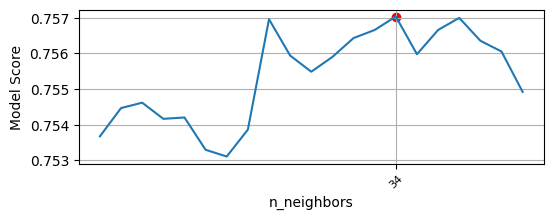

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(20, 41):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    knn_scores.append(model_score)

# Plot score
n_neighbors = [k for k in range(20, 41)]
max_n =     [k      for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
max_score = [score  for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
x_ticks =   [k      for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
print(f"Mô hình có score cao nhất = {max_score[0]:.2f} tại số cây = {max_n}")

plt.figure(figsize=(6, 2))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(n_neighbors, knn_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Model Score')
plt.xticks(x_ticks, rotation=45, size=8)
plt.grid()
plt.show()

# n_neighbors = 34

### results

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=34)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [78]:
# predict
y_pred_KNN = model_KNN.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_KNN, digits = 4))

              precision    recall  f1-score   support

           0     0.7344    0.8061    0.7686     13280
           1     0.7846    0.7079    0.7443     13254

    accuracy                         0.7570     26534
   macro avg     0.7595    0.7570    0.7564     26534
weighted avg     0.7595    0.7570    0.7564     26534



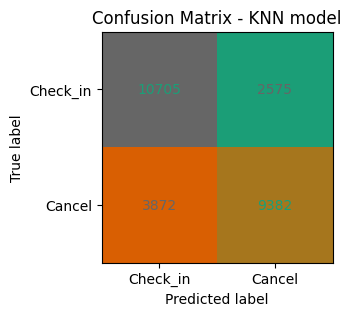

In [93]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_KNN,
                                        display_labels=['Check_in', 'Cancel'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Dark2")
ax.set_title(f"Confusion Matrix - KNN model")
plt.show()

### add dictionary

In [80]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_KNN)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_KNN = model_KNN.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_KNN)
auc_score = roc_auc_score(y_test, y_proba_KNN)

# class_report
report = classification_report(y_test, y_pred_KNN, output_dict=True)

In [81]:
# update dictionary to compare
model_results['KNN'] = {
  'Params': 'n_neighbors = 1',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

# Compare models

In [82]:
model_results

{'Logistic Regresson': {'Params': None,
  'TP': 8814,
  'FN': 4440,
  'TN': 10662,
  'FP': 2618,
  'FP_rate': array([0.        , 0.        , 0.        , ..., 0.99856928, 0.99856928,
         1.        ]),
  'TP_rate': array([0.        , 0.00045269, 0.00090539, ..., 0.99992455, 1.        ,
         1.        ]),
  'ROC AUC Score': 0.8096450935021207,
  'Precision': 0.7709937018894332,
  'Recall': 0.6650067904028972,
  'F1_Score': 0.714088957303735,
  'Accuracy Score': 0.7340016582497927},
 'GNB': {'Params': None,
  'TP': 12696,
  'FN': 584,
  'TN': 7618,
  'FP': 5636,
  'FP_rate': array([0.        , 0.00240964, 0.00240964, ..., 0.99856928, 0.99856928,
         1.        ]),
  'TP_rate': array([0.        , 0.33174891, 0.33182435, ..., 0.99992455, 1.        ,
         1.        ]),
  'ROC AUC Score': 0.7825869117029458,
  'Precision': 0.9061093247588424,
  'Recall': 0.4252301192092953,
  'F1_Score': 0.5788230461127658,
  'Accuracy Score': 0.6908871636391045},
 'Decesion Tree': {'Params': 

In [83]:
# combine and set dataframe
model_results_df = pd.DataFrame.from_dict(model_results, orient='index').reset_index()
model_results_df.rename(columns={'index':'model'}, inplace=True)
model_results_df

model             Params     TP    FN     TN    FP   
0  Logistic Regresson               None   8814  4440  10662  2618  \
1                 GNB               None  12696   584   7618  5636   
2       Decesion Tree      max_depth = 1  10761  2519   3928  9326   
3       Random forest  n_estimators = 90  10122  3158   3420  9834   
4                 KNN    n_neighbors = 1  10705  2575   3872  9382   

                                             FP_rate   
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
1  [0.0, 0.0024096385542168677, 0.002409638554216...   
2  [0.0, 0.011897590361445783, 0.0118975903614457...   
3  [0.0, 0.004969879518072289, 0.0050451807228915...   
4  [0.0, 0.00015060240963855423, 0.00015060240963...   

                                             TP_rate  ROC AUC Score   
0  [0.0, 0.0004526935264825713, 0.000905387052965...          0.810  \
1  [0.0, 0.3317489059906443, 0.33182435491172474,...          0.783   
2  [0.0, 0.3676625924249283, 0.3693979176097782, ...          0.841   
3  [0.0, 0.3629093103968613, 0.3630602082390222, ...          0.839   
4  [0.0, 0.3345405160706202, 0.3387656556511242, ...          0.845   

   Precision  Recall  F1_Score  Accuracy Score  
0      0.771   0.665     0.714           0.734  
1      0.906   0.425     0.579           0.691  
2      0.787   0.704     0.743           0.757  
3      0.757   0.742     0.749           0.752  
4      0.785   0.708     0.744           0.757

In [84]:
model_results_df.columns

Index(['model', 'Params', 'TP', 'FN', 'TN', 'FP', 'FP_rate', 'TP_rate',
       'ROC AUC Score', 'Precision', 'Recall', 'F1_Score', 'Accuracy Score'],
      dtype='object')

[]

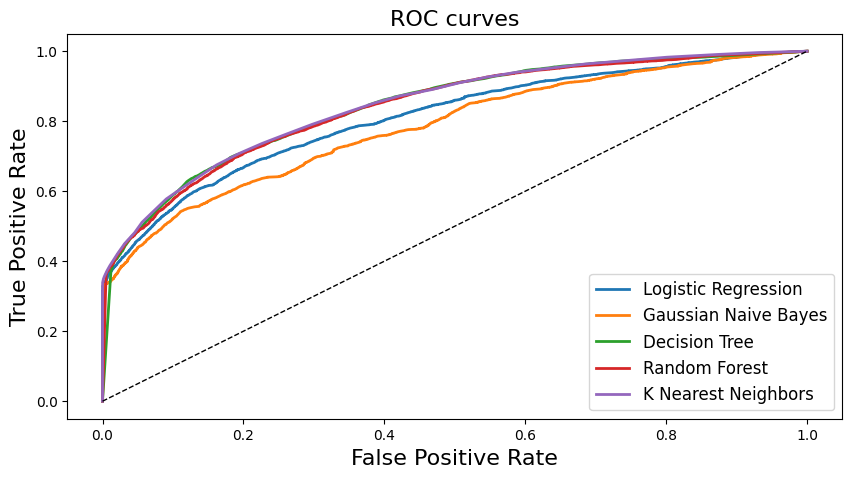

In [85]:
models = model_results_df['model'].unique()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:gray']

plt.figure(figsize=(10,5))

# ROC curve
for model, color in zip(models, colors):
  plt.plot( model_results[model]['FP_rate'] ,model_results[model]['TP_rate'], linewidth=2, color=color )
plt.legend(['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors', 'Support Vector Machine'], fontsize=12)

# Random chances line
plt.plot([0,1], ls='--', linewidth=1, color='black')

# set lable
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# title
plt.title('ROC curves', fontsize=16)

plt.plot()

In [86]:
model_results_df.to_csv('model_results.csv', index=False)

In [87]:
# compare accuracy chart
plt.figure(figsize=(5, 2))
bars = plt.barh(model_results_df['model'], model_results_df['Accuracy Score'], color=colors)

# add % accuracy
for bar, acc_score in zip(bars, model_results_df['Accuracy Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{acc_score*100:.2f}%', va='center')

plt.title('Accuracy Score', fontsize=13)

# set ticks
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

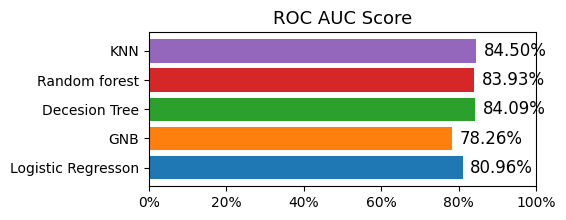

In [88]:
# compare AUC chart
plt.figure(figsize=(5, 2))
bars = plt.barh(model_results_df['model'], model_results_df['ROC AUC Score'], color=colors)

# add % AUC
for bar, auc_score in zip(bars, model_results_df['ROC AUC Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{auc_score*100:.2f}%', va='center', fontsize=12)

plt.title('ROC AUC Score', fontsize=13)

# set ticks
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()